In [100]:
# using the FRAFirm.csv data set

In [95]:
import pandas as pd
import numpy as np
from sklearn import metrics
import pickle
from sklearn import neighbors
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
from sklearn.preprocessing import scale
from sklearn import preprocessing
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('FRAFirm.csv')
df = df.drop_duplicates()

In [3]:
df.head()

,FIRM,class,Start,End,Length,Night,Gap,WS,idx,Base,...,Trans,Press,p1s,p1l,p2s,p2l,MalAdj,NFZ,AFZ,MFZ
0,-10,0,290,610,320,0,999,0,6,5.0,...,-4.0,-4.67,0,0,0,0,0,0,0,0
1,-10,0,905,1265,360,0,295,0,6,5.0,...,-4.0,-4.67,-10,320,0,0,0,0,0,0
2,5,0,1040,1505,465,0,999,1,1,5.0,...,0.0,0.00,-10,360,-10,320,0,0,0,0
3,4,0,920,1295,375,0,855,0,2,5.0,...,0.0,-0.67,5,465,-10,360,0,0,0,0
4,1,0,1280,1775,495,1,999,1,1,2.0,...,-1.0,0.00,4,375,5,465,0,0,0,0


In [4]:
df['class'] == 0

0         True
1         True
2         True
3         True
4         True
         ...  
38754     True
38755     True
38756     True
38757     True
38758    False
Name: class, Length: 37306, dtype: bool

In [5]:
df.groupby('class').count()

,FIRM,Start,End,Length,Night,Gap,WS,idx,Base,StartAdj,...,Trans,Press,p1s,p1l,p2s,p2l,MalAdj,NFZ,AFZ,MFZ
class,,,,,,,,,,,,,,,,,,,,,
0,34862,34862,34862,34862,34862,34862,34862,34862,34862,34862,...,34862,34862,34862,34862,34862,34862,34862,34862,34862,34862
1,1779,1779,1779,1779,1779,1779,1779,1779,1779,1779,...,1779,1779,1779,1779,1779,1779,1779,1779,1779,1779
2,665,665,665,665,665,665,665,665,665,665,...,665,665,665,665,665,665,665,665,665,665


In [6]:
accident0 = df['class'].value_counts()[0]
print("Number of incidents with no accident:", accident0)

Number of incidents with no accident: 34862


In [7]:
accident1 = df['class'].value_counts()[1]
print("Number of incidents with class 1 accidents:", accident1)

Number of incidents with class 1 accidents: 1779


In [8]:
accident2 = df['class'].value_counts()[2]
print("Number of incidents with class 2 accidents:", accident2)

Number of incidents with class 2 accidents: 665


In [9]:
# normalize accident percentage
total_accidents = accident0 + accident1 + accident2
norm_accident0 = accident0 / total_accidents
norm_accident1 = accident1 / total_accidents
norm_accident2 = accident2 / total_accidents

In [10]:
print(norm_accident0)
print("Of all the incidents, there is a {} chance of no accident".format(round(norm_accident0, 3)))

0.934487749959792
Of all the incidents, there is a 0.934 chance of no accident


In [11]:
print(norm_accident1)
print("Of all the incidents, there is a {} chance of class 1 accident".format(round(norm_accident1, 3)))

0.04768669919047874
Of all the incidents, there is a 0.048 chance of class 1 accident


In [12]:
print(norm_accident2)
print("Of all the incidents, there is a {} chance of class 2 accident".format(round(norm_accident2, 3)))

0.017825550849729265
Of all the incidents, there is a 0.018 chance of class 2 accident


In [13]:
# how many times does accident 1 occur than accident 2
x = norm_accident1 / norm_accident2
print("Incident 1 occurs {} times more than incident 2".format(round(x, 2)))


Incident 1 occurs 2.68 times more than incident 2


In [14]:
# printing out all column names
for col in df.columns:
    print(col)

FIRM
class
Start
End
Length
Night
Gap
WS
idx
Base
StartAdj
LenAdj
Comp
Trans
Press
p1s
p1l
p2s
p2l
MalAdj
NFZ
AFZ
MFZ


In [15]:
df['Start']

0         290
1         905
2        1040
3         920
4        1280
         ... 
38754     855
38755     105
38756     360
38757     720
38758    1245
Name: Start, Length: 37306, dtype: int64

In [16]:
df['End'].min()

245

In [17]:
# function to get average
def find_average(my_list):
    counter = 0
    for ele in my_list:
        counter += ele
    return round(counter / len(my_list))

In [18]:
def normalize(instances, my_list):
    return round(instances / sum(my_list), 3)

In [19]:
# finding average of min length
min0 = df.loc[df['class'] == 0, 'Length'].min()
min1 = df.loc[df['class'] == 1, 'Length'].min()
min2 = df.loc[df['class'] == 2, 'Length'].min()

max0 = df.loc[df['class'] == 0, 'Length'].max()
max1 = df.loc[df['class'] == 1, 'Length'].max()
max2 = df.loc[df['class'] == 2, 'Length'].max()

In [20]:
min_list = [min0, min1, min2]
max_list = [max0, max1, max2]
print(find_average(min_list))
print(find_average(max_list))

249
1372


In [21]:
# splitting lengths into 3 parts
temp = find_average(max_list) - find_average(min_list)
temp = round(temp / 3)
first_increment = find_average(min_list) + temp
second_increment = find_average(min_list) + temp * 2
third_increment = find_average(min_list) + temp * 3

I wanted to find out if Length had any correlation to the type of incident that occurs. 

In [22]:
length_class0 = df.loc[df['class'] == 0, 'Length']
length_class1 = df.loc[df['class'] == 1, 'Length']
length_class2 = df.loc[df['class'] == 2, 'Length']

In [23]:
# lowLength0 = []
# midLength0 = []
# highLength0 = []
# for row in length_class0:
#     if row < 470:
#         lowLength0.append(row)
#     elif row < 940:
#         midLength0.append(row)
#     else:
#         highLength0.append(row)

In [24]:
# there are 8907 instances where Length is considered "low"
# when there are no accidents
# print(len(lowLength0))
# print(len(midLength0))
# print(len(highLength0))

In [25]:
def lowmidhigh_length(my_column):
    lowLength = []
    midLength = []
    highLength = []
    for row in my_column:
        if row < first_increment: 
            lowLength.append(row)
        elif row < second_increment:
            midLength.append(row)
        else:
            highLength.append(row)
    return lowLength, midLength, highLength

In [26]:
low0 = len(lowmidhigh_length(length_class0)[0])
mid0 = len(lowmidhigh_length(length_class0)[1])
high0 = len(lowmidhigh_length(length_class0)[2])

low1 = len(lowmidhigh_length(length_class1)[0])
mid1 = len(lowmidhigh_length(length_class1)[1])
high1 = len(lowmidhigh_length(length_class1)[2])

low2 = len(lowmidhigh_length(length_class2)[0])
mid2 = len(lowmidhigh_length(length_class2)[1])
high2 = len(lowmidhigh_length(length_class2)[2])

Most accidents occur when length is between 623 and 997

In [27]:
print("Incident 0; {} occurances where Length is considered low: below {}".format(low0, first_increment))
print("Incident 0; {} occurances where Length is considered mid: below {}".format(mid0, second_increment))
print("Incident 0; {} occurances where Length is considered high: below {}".format(high0, third_increment))
print(normalize(low0, [low0, mid0, high0]))
print(normalize(mid0, [low0, mid0, high0]))
print(normalize(high0, [low0, mid0, high0]))

Incident 0; 19365 occurances where Length is considered low: below 623
Incident 0; 15352 occurances where Length is considered mid: below 997
Incident 0; 145 occurances where Length is considered high: below 1371
0.555
0.44
0.004


In [28]:
print("Incident 1; {} occurances where Length is considered low: below {}".format(low1, first_increment))
print("Incident 1; {} occurances where Length is considered mid: below {}".format(mid1, second_increment))
print("Incident 1; {} occurances where Length is considered high: below {}".format(high1, third_increment))
print(normalize(low1, [low1, mid1, high1]))
print(normalize(mid1, [low1, mid1, high1]))
print(normalize(high1, [low1, mid1, high1]))

Incident 1; 232 occurances where Length is considered low: below 623
Incident 1; 1408 occurances where Length is considered mid: below 997
Incident 1; 139 occurances where Length is considered high: below 1371
0.13
0.791
0.078


In [29]:
print("Incident 2; {} occurances where Length is considered low: below {}".format(low2, first_increment))
print("Incident 2; {} occurances where Length is considered mid: below {}".format(mid2, second_increment))
print("Incident 2; {} occurances where Length is considered high: below {}".format(high2, third_increment))
print(normalize(low2, [low2, mid2, high2]))
print(normalize(mid2, [low2, mid2, high2]))
print(normalize(high2, [low2, mid2, high2]))

Incident 2; 156 occurances where Length is considered low: below 623
Incident 2; 443 occurances where Length is considered mid: below 997
Incident 2; 66 occurances where Length is considered high: below 1371
0.235
0.666
0.099


Given the features, can we predict if an accident will occur? 

And if so, will it be of type 1 or type 2?

In [30]:
# chance of accident when length is low (below 623)
print(round(1 - normalize(low0, [low0, low1, low2]), 3))

0.02


In [31]:
# chance of accident when length is mid and high (above 623)
number_of_accidents = mid1 + mid2 + high1 + high2
list_of_accidents = [low1]
# print(round(normalize(mid1+high1, [])))
print(number_of_accidents)

2056


Chance of accidents: 

In [32]:
def minutesToHours(minutes):
    hours = minutes / 60
    seconds = (hours % 1) * 60
    return ("{} hrs {} mins".format(math.floor(hours),round(seconds)))

In [33]:
x = 997
temp_x = minutesToHours(x)
print(temp_x)

16 hrs 37 mins


In [34]:
# chance of accident (incident 1) occurin when low length (below 623)
low_acc1_chance = normalize(low1, [low0, low1, low2])
print("Chance of accident (incident 1) when working under {}: {}".format(minutesToHours(623), low_acc1_chance))

Chance of accident (incident 1) when working under 10 hrs 23 mins: 0.012


In [35]:
# chance of accident (incident 1) happening when mid length (between 623 and 997)
mid_acc1_chance = normalize(mid1, [mid0,mid1,mid2])
print("Chance of accident (incident 1) when working between {} and {}: {}".format(minutesToHours(623), minutesToHours(997), mid_acc1_chance))

Chance of accident (incident 1) when working between 10 hrs 23 mins and 16 hrs 37 mins: 0.082


In [36]:
# chance of accident (incident 1) occuring when high length (more than 997)
high_acc1_chance = normalize(high1, [high0, high1, high2])
print("Chance of accident (incident 1) when working more than {}: {}".format(minutesToHours(997), high_acc1_chance))

Chance of accident (incident 1) when working more than 16 hrs 37 mins: 0.397


In [37]:
# chance of accident (incident 2) occuring when low length (below 623)
low_acc2_chance = normalize(low2, [low0, low1, low2])
print("Chance of accident (incident 2) when working under {}: {}".format(minutesToHours(623), low_acc2_chance))

Chance of accident (incident 2) when working under 10 hrs 23 mins: 0.008


In [38]:
# chance of accident (incident 2) occuring when mid length (between 623 and 997)
mid_acc2_chance = normalize(mid2, [mid0, mid1, mid2])
print("Chance of accident (incident 2) when working between {} and {}: {}".format(minutesToHours(623), minutesToHours(997), mid_acc2_chance))

Chance of accident (incident 2) when working between 10 hrs 23 mins and 16 hrs 37 mins: 0.026


In [39]:
# chance of accident (incident 2) occuring when high length (more than 997)
high_acc2_chance = normalize(high2, [high0, high1, high2])
print("Chance of accident (incident 2) when working more than {}: {}".format(minutesToHours(997), high_acc2_chance))

Chance of accident (incident 2) when working more than 16 hrs 37 mins: 0.189


So what do these numbers mean? If we find a worker that is currently working less than 10 hours and 23 minutes, the chances of an accident (specifically incident 1) occuring would be around 1.2%. The chance of an accident (incident 2) occuring would be around 0.8%. If we selected a random worker and asked, "How long have you been working?" and they answer that they have been working between 10 hours 23 minutes and 16 hours 37 minutes, the chance of an accident (incident 1) of occuring becomes 8.2%, while the chance of an accident (incident 2) of occuring rises to 2.6%. But things seem to turn for the worst if a worker exheeds 16 hours 37 minutes. After 16 hours 37 minutes, incident 1 shoots up to 39.7%, while incident 2 shoots up to 18.9%. 

In [40]:
df['Night'].unique()

array([0, 1])

In [41]:
df[['Night', 'Length', 'class']]

,Night,Length,class
0,0,320,0
1,0,360,0
2,0,465,0
3,0,375,0
4,1,495,0
...,...,...,...
38754,0,420,0
38755,1,375,0
38756,0,520,0
38757,0,555,0


Is there a correlation between Night, Length, and class

In [42]:
# make separate dfs with night = 0 and night = 1
df_dayTime = df.loc[df['Night'] == 0]
df_nightTime = df.loc[df['Night'] == 1]

In [43]:
len(df_dayTime)

21925

In [44]:
len(df_nightTime)

15381

In [45]:
len(df.loc[df_dayTime['class']] == 1)

21925

In [46]:
df.loc[df_dayTime['class']] == 0

,FIRM,class,Start,End,Length,Night,Gap,WS,idx,Base,...,Trans,Press,p1s,p1l,p2s,p2l,MalAdj,NFZ,AFZ,MFZ
0,False,True,False,False,False,True,False,True,False,False,...,False,False,True,True,True,True,True,True,True,True
0,False,True,False,False,False,True,False,True,False,False,...,False,False,True,True,True,True,True,True,True,True
0,False,True,False,False,False,True,False,True,False,False,...,False,False,True,True,True,True,True,True,True,True
0,False,True,False,False,False,True,False,True,False,False,...,False,False,True,True,True,True,True,True,True,True
0,False,True,False,False,False,True,False,True,False,False,...,False,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,False,True,False,False,False,True,False,True,False,False,...,False,False,True,True,True,True,True,True,True,True
0,False,True,False,False,False,True,False,True,False,False,...,False,False,True,True,True,True,True,True,True,True
0,False,True,False,False,False,True,False,True,False,False,...,False,False,True,True,True,True,True,True,True,True
0,False,True,False,False,False,True,False,True,False,False,...,False,False,True,True,True,True,True,True,True,True


In [47]:
df_dayTime.groupby('class').count()

,FIRM,Start,End,Length,Night,Gap,WS,idx,Base,StartAdj,...,Trans,Press,p1s,p1l,p2s,p2l,MalAdj,NFZ,AFZ,MFZ
class,,,,,,,,,,,,,,,,,,,,,
0,20839,20839,20839,20839,20839,20839,20839,20839,20839,20839,...,20839,20839,20839,20839,20839,20839,20839,20839,20839,20839
1,788,788,788,788,788,788,788,788,788,788,...,788,788,788,788,788,788,788,788,788,788
2,298,298,298,298,298,298,298,298,298,298,...,298,298,298,298,298,298,298,298,298,298


In [48]:
df_nightTime.groupby('class').count()

,FIRM,Start,End,Length,Night,Gap,WS,idx,Base,StartAdj,...,Trans,Press,p1s,p1l,p2s,p2l,MalAdj,NFZ,AFZ,MFZ
class,,,,,,,,,,,,,,,,,,,,,
0,14023,14023,14023,14023,14023,14023,14023,14023,14023,14023,...,14023,14023,14023,14023,14023,14023,14023,14023,14023,14023
1,991,991,991,991,991,991,991,991,991,991,...,991,991,991,991,991,991,991,991,991,991
2,367,367,367,367,367,367,367,367,367,367,...,367,367,367,367,367,367,367,367,367,367


In [49]:
accident0 = df['class'].value_counts()[0]

In [50]:
accident0

34862

In [51]:
# num of classes based on day
class0_dayTime = df_dayTime['class'].value_counts()[0]
class1_dayTime = df_dayTime['class'].value_counts()[1]
class2_dayTime = df_dayTime['class'].value_counts()[2]

In [52]:
# num of classes based on night
class0_nightTime = df_nightTime['class'].value_counts()[0]
class1_nightTime = df_nightTime['class'].value_counts()[1]
class2_nightTime = df_nightTime['class'].value_counts()[2]

In [53]:
temp = [class0_dayTime, class1_dayTime, class2_dayTime,
       class0_nightTime, class1_nightTime, class2_nightTime]

In [54]:
dayTime_list = []
nightTime_list = []
for i, j in enumerate(temp):
    if i < 3:
        dayTime_list.append(j)
    else:
        nightTime_list.append(j)

In [55]:
# number of separate classes for day time and night time
print(dayTime_list)
print(nightTime_list)

[20839, 788, 298]
[14023, 991, 367]


In [56]:
## normalize daytime list and nightime list

In [57]:
dayAccPerc = round(1 - normalize(dayTime_list[0], dayTime_list), 3)

In [58]:
nightAccPerc = round(1 - normalize(nightTime_list[0], nightTime_list), 3)

In [59]:
print("Chance for accident during the day: {}".format(dayAccPerc))

Chance for accident during the day: 0.05


In [60]:
print("Chance for accident during the night: {}".format(nightAccPerc))

Chance for accident during the night: 0.088


In [61]:
# How many more accidents happen during the night?
x = round((nightAccPerc / dayAccPerc), 3)
print("Accidents occur {} times more often at night than the day".format(x))

Accidents occur 1.76 times more often at night than the day


Accidents (regardless of incident) seem to occur 1.76 times more often during the night than during the day

In [62]:
x = df.to_numpy()
y = df['class'].to_numpy()
dims = x.shape[1]
N = x.shape[0]

In [63]:
# do we have to use knn?
knn = neighbors.KNeighborsClassifier(n_neighbors = 11)

In [64]:
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=11)

In [65]:
yhat = knn.predict(x)

In [66]:
# why do we use -1? Why not 183? or 874?
print("Predicted value: {}, real target: {}".format(yhat[-1], y[-1]))

Predicted value: 0, real target: 1


In [67]:
# This value does not seem to be helpful
# This could quite possibly mean that about 94% of the data is predicted as 0, but that is not the case. 
knn.score(x, y)

0.9375167533372648

In [68]:
# confusion matrix for 0 and 1
TP = np.sum(np.logical_and(yhat == 0, y == 0))
TN = np.sum(np.logical_and(yhat == 1, y == 1))
FP = np.sum(np.logical_and(yhat == 0, y == 1))
FN = np.sum(np.logical_and(yhat == 1, y == 0))
print(f'TP: {TP:4}, FP: {FP:4}')
print(f'FN: {FN:4}, TN: {TN:4}')

TP: 34784, FP: 1590
FN:   73, TN:  184


In [69]:
# confusion matrix for 0 and 2
TP = np.sum(np.logical_and(yhat == 0, y == 0))
TN = np.sum(np.logical_and(yhat == 2, y == 2))
FP = np.sum(np.logical_and(yhat == 0, y == 2))
FN = np.sum(np.logical_and(yhat == 2, y == 0))
print(f'TP: {TP:4}, FP: {FP:4}')
print(f'FN: {FN:4}, TN: {TN:4}')

TP: 34784, FP:  617
FN:    5, TN:    7


In [70]:
# confusion matrix for 1 and 2
TP = np.sum(np.logical_and(yhat == 1, y == 1))
TN = np.sum(np.logical_and(yhat == 2, y == 2))
FP = np.sum(np.logical_and(yhat == 1, y == 2))
FN = np.sum(np.logical_and(yhat == 2, y == 1))
print(f'TP: {TP:4}, FP: {FP:4}')
print(f'FN: {FN:4}, TN: {TN:4}')

TP:  184, FP:   41
FN:    5, TN:    7


In [71]:
metrics.confusion_matrix(yhat, y)

array([[34784,  1590,   617],
       [   73,   184,    41],
       [    5,     5,     7]])

In [72]:
# which columns are significant? which are not? Use linear regression? maybe
# sns.scatterplot(x='Length',y='class')

In [73]:
df.columns

Index(['FIRM', 'class', 'Start', 'End', 'Length', 'Night', 'Gap', 'WS', 'idx',
       'Base', 'StartAdj', 'LenAdj', 'Comp', 'Trans', 'Press', 'p1s', 'p1l',
       'p2s', 'p2l', 'MalAdj', 'NFZ', 'AFZ', 'MFZ'],
      dtype='object')

In [74]:
df[['Length', 'class']]

,Length,class
0,320,0
1,360,0
2,465,0
3,375,0
4,495,0
...,...,...
38754,420,0
38755,375,0
38756,520,0
38757,555,0


In [75]:
df.corr()

,FIRM,class,Start,End,Length,Night,Gap,WS,idx,Base,...,Trans,Press,p1s,p1l,p2s,p2l,MalAdj,NFZ,AFZ,MFZ
FIRM,1.000000,-0.076097,-0.061856,-0.131299,-0.189567,-0.375051,0.266764,0.431107,-0.747004,0.375051,...,0.747090,0.709456,0.645925,-0.121076,0.510789,-0.141734,NaN,-0.033252,0.014762,-0.034030
class,-0.076097,1.000000,0.006215,0.101814,0.246862,0.072098,-0.004571,0.015209,-0.003790,-0.072098,...,-0.013197,-0.005773,-0.002329,0.052798,-0.004832,0.090839,NaN,0.147683,0.304255,0.178208
Start,-0.061856,0.006215,1.000000,0.921279,-0.023652,0.420424,0.016366,0.051610,-0.008744,-0.420424,...,-0.054558,-0.017897,-0.052771,0.013629,-0.036806,0.008870,NaN,-0.068787,-0.038672,-0.078587
End,-0.131299,0.101814,0.921279,1.000000,0.367002,0.473514,0.014045,0.041333,-0.005475,-0.473514,...,-0.054549,-0.029143,-0.064879,0.086627,-0.048654,0.071956,NaN,-0.045808,-0.001396,-0.055308
Length,-0.189567,0.246862,-0.023652,0.367002,1.000000,0.211609,-0.003040,-0.017195,0.006840,-0.211609,...,-0.009726,-0.032108,-0.040556,0.190087,-0.037035,0.163756,NaN,0.046778,0.088911,0.045799
Night,-0.375051,0.072098,0.420424,0.473514,0.211609,1.000000,-0.017297,0.011419,0.021840,-1.000000,...,-0.154110,-0.071130,-0.137806,0.040462,-0.090687,0.040131,NaN,0.045079,-0.060774,0.023880
Gap,0.266764,-0.004571,0.016366,0.014045,-0.003040,-0.017297,1.000000,0.389992,-0.197550,0.017297,...,0.098740,0.167435,0.051024,-0.189512,0.104421,-0.117842,NaN,-0.003038,-0.007611,-0.006499
WS,0.431107,0.015209,0.051610,0.041333,-0.017195,0.011419,0.389992,1.000000,-0.429531,-0.011419,...,0.288606,0.334925,0.023888,-0.166958,0.093516,-0.102432,NaN,0.001477,-0.005915,0.001924
idx,-0.747004,-0.003790,-0.008744,-0.005475,0.006840,0.021840,-0.197550,-0.429531,1.000000,-0.021840,...,-0.713934,-0.976615,-0.621976,0.101184,-0.536530,0.137398,NaN,0.005572,-0.001000,0.004168
Base,0.375051,-0.072098,-0.420424,-0.473514,-0.211609,-1.000000,0.017297,-0.011419,-0.021840,1.000000,...,0.154110,0.071130,0.137806,-0.040462,0.090687,-0.040131,NaN,-0.045079,0.060774,-0.023880


In [76]:
df = df.drop('MalAdj', axis=1)

In [77]:
df.columns

Index(['FIRM', 'class', 'Start', 'End', 'Length', 'Night', 'Gap', 'WS', 'idx',
       'Base', 'StartAdj', 'LenAdj', 'Comp', 'Trans', 'Press', 'p1s', 'p1l',
       'p2s', 'p2l', 'NFZ', 'AFZ', 'MFZ'],
      dtype='object')

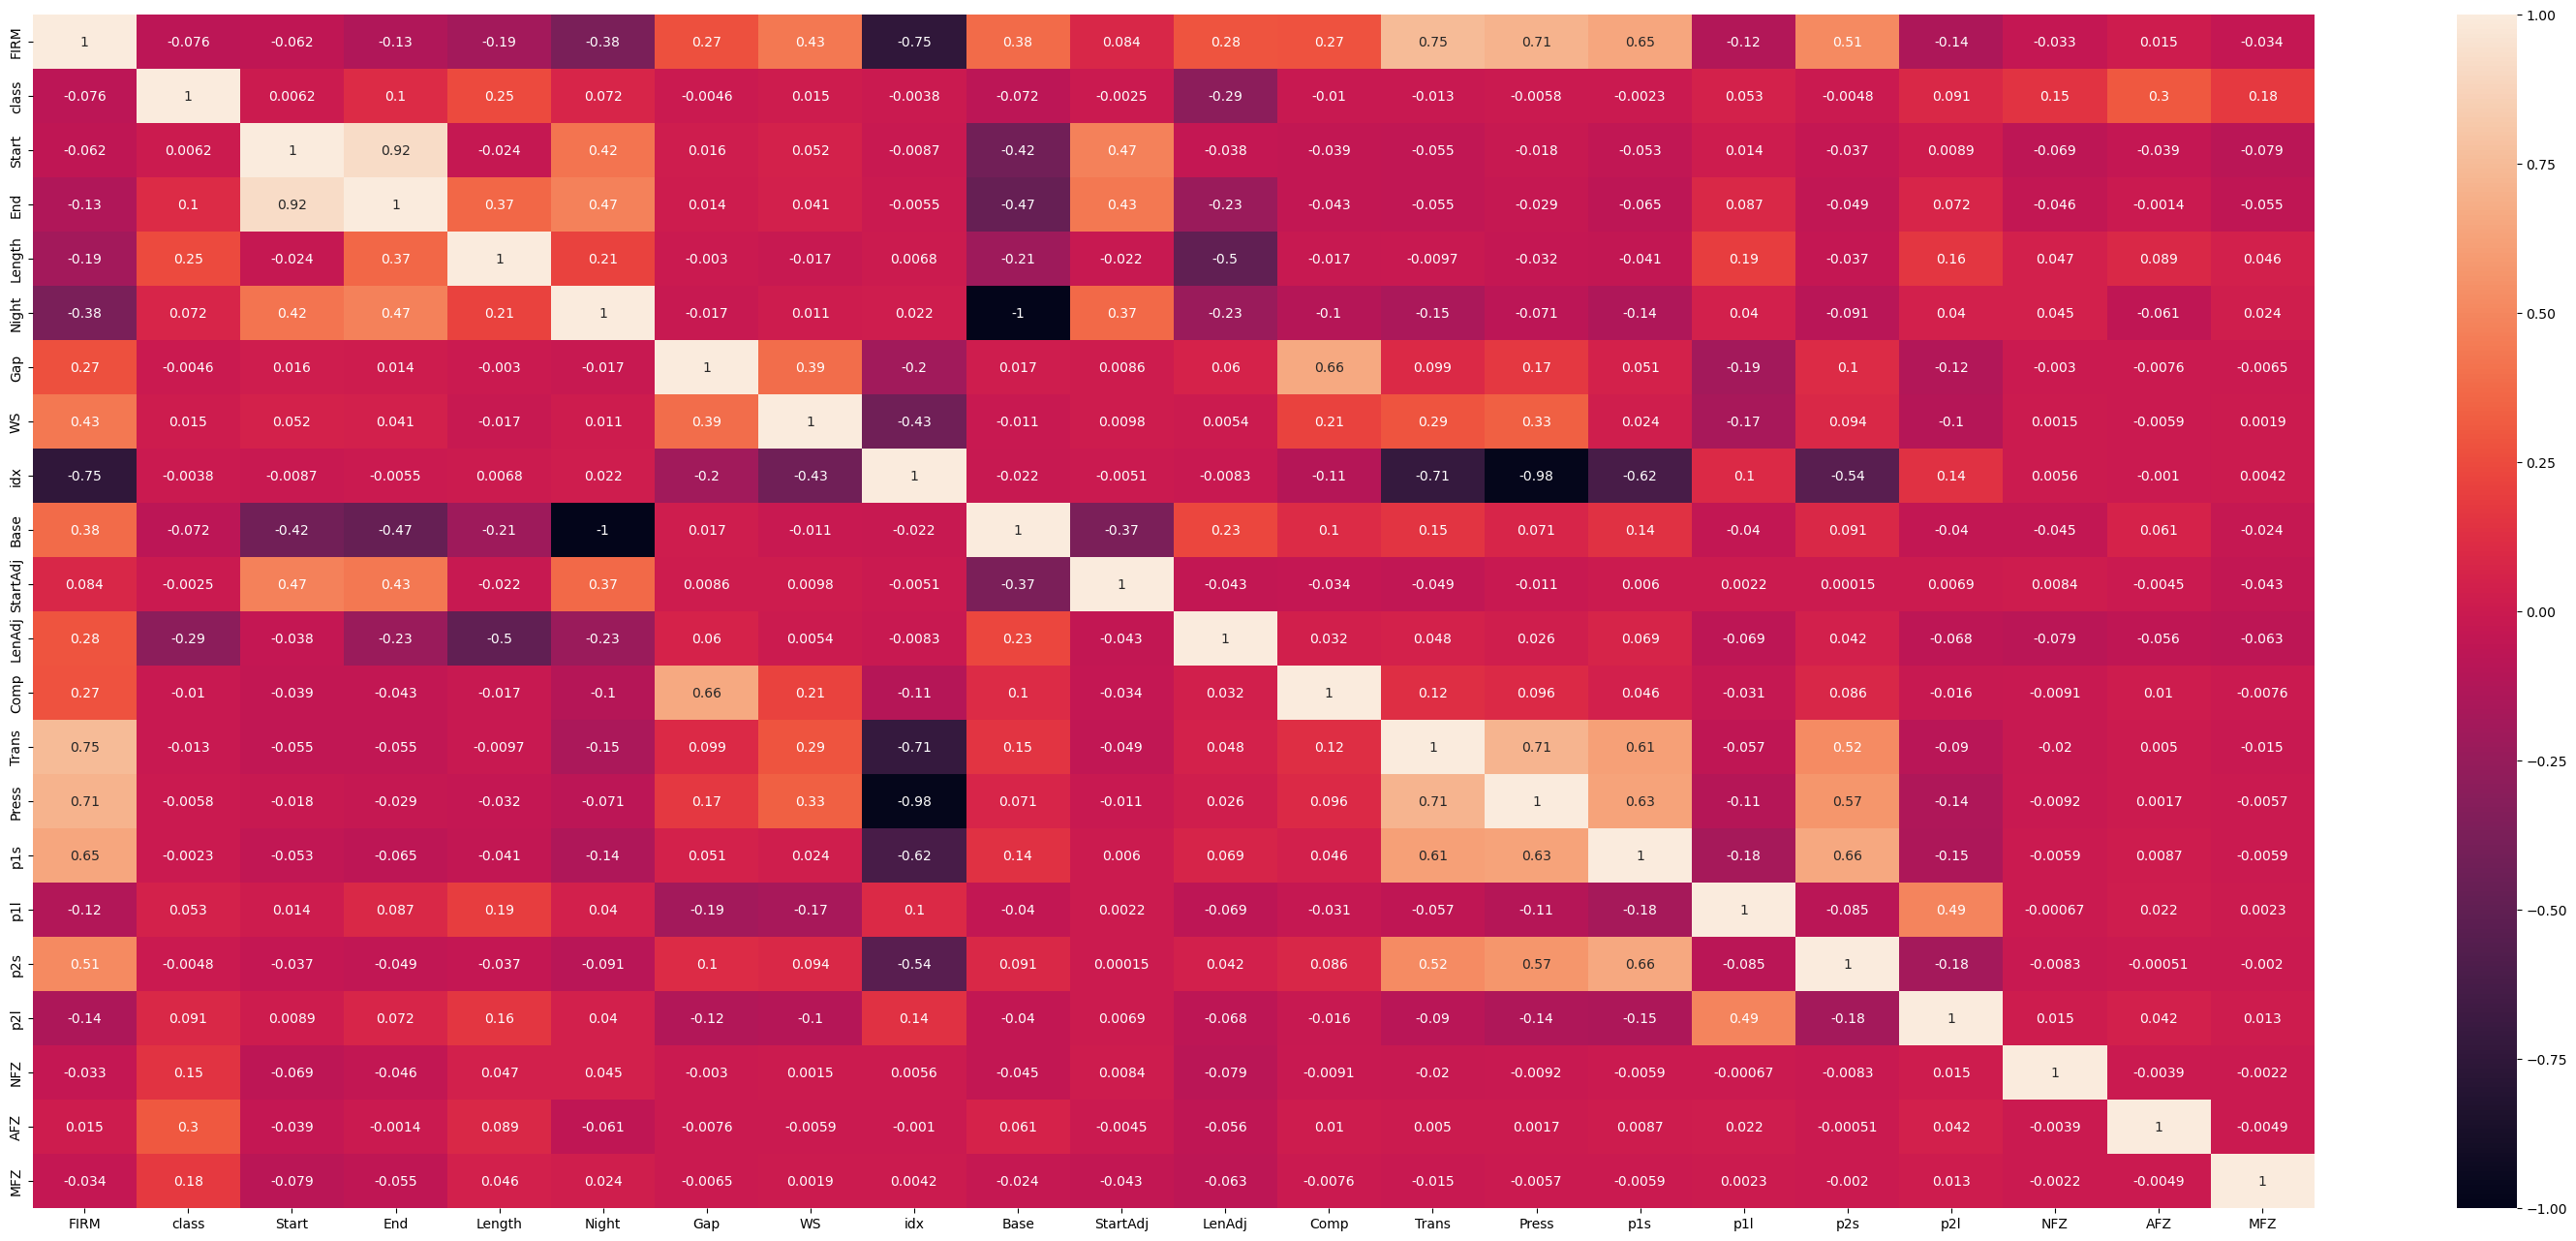

In [78]:
plt.figure(figsize = (38, 16))
sns.heatmap(df.corr(), annot = True)
plt.show()

Between 

In [79]:
len(df[df['class']==0])

34862

In [80]:
df[df['class']==0]

,FIRM,class,Start,End,Length,Night,Gap,WS,idx,Base,...,Comp,Trans,Press,p1s,p1l,p2s,p2l,NFZ,AFZ,MFZ
0,-10,0,290,610,320,0,999,0,6,5.0,...,0.0,-4.0,-4.67,0,0,0,0,0,0,0
1,-10,0,905,1265,360,0,295,0,6,5.0,...,0.0,-4.0,-4.67,-10,320,0,0,0,0,0
2,5,0,1040,1505,465,0,999,1,1,5.0,...,0.0,0.0,0.00,-10,360,-10,320,0,0,0
3,4,0,920,1295,375,0,855,0,2,5.0,...,0.0,0.0,-0.67,5,465,-10,360,0,0,0
4,1,0,1280,1775,495,1,999,1,1,2.0,...,0.0,-1.0,0.00,4,375,5,465,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38753,-3,0,110,600,490,1,999,0,5,2.0,...,0.0,-2.0,-3.33,-2,660,4,580,0,0,0
38754,-2,0,855,1275,420,0,999,0,6,5.0,...,0.0,-3.0,-4.00,-3,490,-2,660,0,0,0
38755,-9,0,105,480,375,1,999,0,7,2.0,...,0.0,-5.0,-5.50,-2,420,-3,490,0,0,0
38756,-10,0,360,880,520,0,999,0,8,5.0,...,0.0,-6.0,-6.50,-9,375,-2,420,0,0,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37306 entries, 0 to 38758
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FIRM      37306 non-null  int64  
 1   class     37306 non-null  int64  
 2   Start     37306 non-null  int64  
 3   End       37306 non-null  int64  
 4   Length    37306 non-null  int64  
 5   Night     37306 non-null  int64  
 6   Gap       37306 non-null  int64  
 7   WS        37306 non-null  int64  
 8   idx       37306 non-null  int64  
 9   Base      37306 non-null  float64
 10  StartAdj  37306 non-null  float64
 11  LenAdj    37306 non-null  float64
 12  Comp      37306 non-null  float64
 13  Trans     37306 non-null  float64
 14  Press     37306 non-null  float64
 15  p1s       37306 non-null  int64  
 16  p1l       37306 non-null  int64  
 17  p2s       37306 non-null  int64  
 18  p2l       37306 non-null  int64  
 19  NFZ       37306 non-null  int64  
 20  AFZ       37306 non-null  in

Which columns are useless and is not helpful during ML?

In [82]:
print(df['AFZ'].unique())
print(df['NFZ'].unique())
print(df['MFZ'].unique())

[0 1]
[0 1]
[0 1]


In [83]:
print(len(df[df['AFZ']==0]))
print(len(df[df['AFZ']==1]))

print()

print(len(df[df['NFZ']==0]))
print(len(df[df['NFZ']==1]))

print()

print(len(df[df['MFZ']==0]))
print(len(df[df['MFZ']==1]))

36994
312

37240
66

37202
104


AFZ, NFZ, MFZ are not necessary column. Data is too skewed to one direction.

In [84]:
df = df.drop(['AFZ','NFZ','MFZ'],axis=1)

In [85]:
len(df['class'])

37306

In [86]:
# I have a suspicion that columns with a small number of unique values are not as helpful. But let's explore
for i in df.columns:
    if len(df[i].unique()) < 10:
        print("{}: {}".format(i, df[i].unique()))
    # print(len(df[i].unique()))
    # big_values = ['Length', 'Gap', 'Press', 'p1l', 'p2l']
    # if i in big_values:
    #     continue
    # print("{}: {}".format(i, df[i].unique()))

class: [0 1 2]
Night: [0 1]
WS: [0 1]
Base: [5. 2.]


In [87]:
len(df[df['WS']==1])

10157

In [88]:
len(df[df['WS']==0])

27149

In [89]:
len(df[df['Base']==5.])

21925

In [90]:
len(df[df['Base']==2.])

15381

There seems to be a lot of data for the binary classifers of WS and Base. Could WS or Base be present more often in incident 1 or 2?

In [91]:
ws_class0 = len(df.loc[df['WS']==1])
ws_class0

10157

In [92]:
# using logestic regression
y = df['class']
X = df.iloc[:, df.columns != 'class']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, stratify=y)

In [96]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [97]:
model = LogisticRegression();
model.fit(X_train_scaled, y_train)
train_accuracy = model.score(X_train_scaled, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 93.50%
The accuracy for the test set is 95.00%


In [98]:
test_accuracy = model.score(X_test, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the test set is 5.00%


In [99]:
model2 = LogisticRegression();
model2.fit(X_train, y_train)
train_accuracy = model2.score(X_train, y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model2.score(X_test, y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 93.22%
The accuracy for the test set is 95.00%


My analysis is inconclusive. However, based on the data, I do not believe there are features that are specific for incident 1 and incident 2. In the future, I would like to replace all class = 2 values to class = 1, turning the class into a binary classifier. According to KNN as well as the Logestic regressor, I've received about a 93 - 94% accuracy. But even this may be a bit skewed. Most of the class is labeled as 0 (having no accident) at around this same percentage. So even if the model predicted 0's for everything (which is obviously incorrect), the model would still calculate an accuracy of 93ish%. Many features could be ignored in the data set. Primary culprits include features where the values of heavily imbalanced, such as in AFZ NFZ MFZ. Also, it was difficult to figure out what these columns mean. It was best to just eliminate them for now. In the future, I would like to re-look at the data without the extraneous columns, and maybe I'd be able to discover some more secrets within the dataset. 